# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Calculate the PDF from a given dataset containing real-valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn

## Let's get started

Let's import the necessary libraries for this lab.

In [136]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 
import seaborn as sns
from pandasql import sqldf

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [137]:
data = pd.read_csv('weight-height.csv')
#print(len(data))

pysqldf = lambda q: sqldf(q, globals())

male_df = pysqldf('''SELECT * FROM data WHERE Gender = "Male"''') # get male df
#print(male_df.head())

female_df =  data[data['Gender']=='Female'] # get female df
#print(female_df.head())

male_H_mean = male_df.Height.mean()
print(male_H_mean)
# Male Height mean: 69.02634590621737

male_H_std = male_df.Height.std()
print(male_H_std)
# Male Height sd: 2.8633622286606517


male_W_mean = male_df.Weight.mean()
print(male_W_mean)
# Male Weight mean: 187.0206206581929

male_W_std = male_df.Weight.std()
print(male_W_std)
# Male Weight sd: 19.781154516763813



female_H_mean = female_df.Height.mean()
print(female_H_mean)
# Female Height mean: 63.708773603424916

female_H_std = female_df.Height.std()
print(female_H_std)
# Female Height sd: 2.696284015765056

female_W_mean = female_df.Weight.mean()
print(female_W_mean)
# Female Weight mean: 135.8600930074687

female_W_std = female_df.Weight.std()
print(female_W_std)
# Female Weight sd: 19.022467805319007

69.02634590621737
2.8633622286606517
187.0206206581929
19.781154516763813
63.708773603424916
2.696284015765056
135.8600930074687
19.022467805319007


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- use binsize = 10, set alpha level so that overlap can be visualized

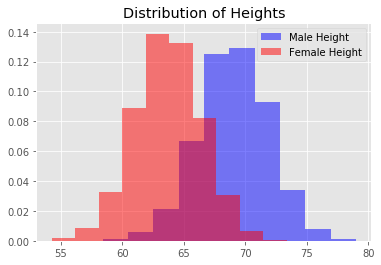

In [138]:
# Your code here
plt.hist(male_df.Height, alpha=0.5, bins=10, density=True, label='Male Height', color = 'blue')
plt.hist(female_df.Height, alpha=0.5, bins=10, density=True, label='Female Height', color = 'red')
plt.title('Distribution of Heights')
plt.legend()
plt.show()

In [139]:
# Record your observations - are these inline with your personal observations?
# yes. This histogram matches the means recorded previously. 

## Create a density function using interpolation


- Write a densit function density() that uses interpolation and takes in a random variable
- Use`np.hist`
- The function should return two lists carrying x and y coordinates for plotting the density function

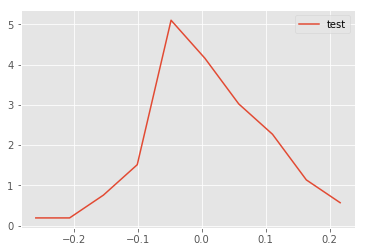

In [140]:
def density(x):
    
    n, bins = np.histogram(x, 10, density=1)
    
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for k in range(n.size):
        pdfx[k] = 0.5 * (bins[k] + bins[k+1])
        pdfy[k] = n[k]

    return pdfx, pdfy

    
# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add Overlapping density plots to the histograms plotted earlier

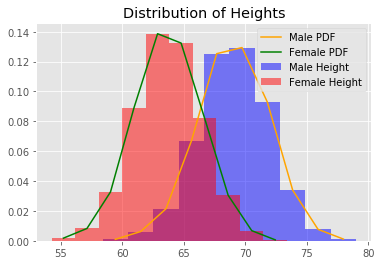

In [141]:
# You code here 
plt.hist(male_df.Height, alpha=0.5, bins=10, density=True, label='Male Height', color='b')
plt.hist(female_df.Height, alpha=0.5, bins=10, density=True, label='Female Height', color='r')

x,y = density(male_df.Height)
plt.plot(x, y, label='Male PDF', color = 'orange')

x,y = density(female_df.Height)
plt.plot(x, y, label='Female PDF', color = 'green')

plt.title('Distribution of Heights')
plt.legend()
plt.show()

## Repeat above exerice for male and female weights

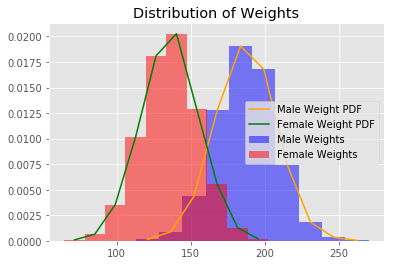

In [142]:
# Your code here
plt.hist(male_df.Weight, bins=10, label='Male Weights', density=True, alpha=0.5, color='blue')
plt.hist(female_df.Weight, bins=10, label='Female Weights', density=True, alpha=0.5, color='red')

x, y = density(male_df.Weight)
plt.plot(x, y, label='Male Weight PDF', color='orange')

x, y = density(female_df.Weight)
plt.plot(x, y, label='Female Weight PDF', color='green')

plt.title('Distribution of Weights')
plt.legend()
plt.show()

## Write your observations in the cell below

In [143]:
# Record your observations - are these inline with your personal observations?
# yes, The males are taller and heavier most of the time and there is a bell curve

# What is the takeaway when comparing male and female heights and weights?
# That males are taller and heavier most of the time and there is a bell curve

## Repeat Above experiments in seaborn and compare with your results

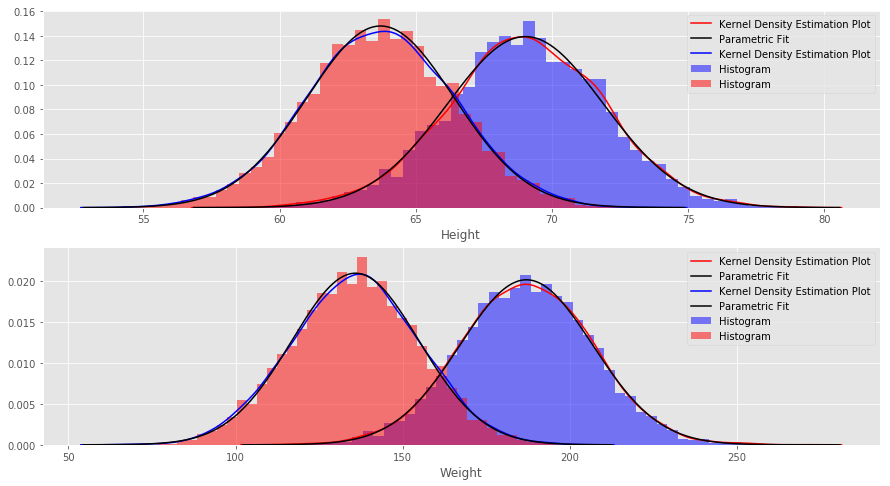

In [144]:
# Code for heights here
import scipy.stats as stats

fig, (ax1, ax2) = plt.subplots(2, figsize=(15,8))


sns.distplot(male_df.Height,
             hist=True, hist_kws={
                 'alpha' : 0.5,
                 'label' : 'Histogram',
                 'color' : 'blue'
             },
             kde=True, kde_kws={
                 'label' : 'Kernel Density Estimation Plot',
                 'color' : 'red'
             },
             fit=stats.norm, fit_kws={
                 'label' : 'Parametric Fit',
                 'color' : '0'
             },
             ax = ax1
            )

sns.distplot(female_df.Height,
             hist=True, hist_kws={
                 'alpha' : 0.5,
                 'label' : 'Histogram',
                 'color' : 'red'
             },
             kde=True, kde_kws={
                 'label' : 'Kernel Density Estimation Plot',
                 'color' : 'blue'
             },
             fit=stats.norm, fit_kws={
                 'label' : 'Parametric Fit',
                 'color' : '0'
             },
             ax = ax1
            )


sns.distplot(male_df.Weight,
             hist=True, hist_kws={
                 'alpha' : 0.5,
                 'label' : 'Histogram',
                 'color' : 'blue'
             },
             kde=True, kde_kws={
                 'label' : 'Kernel Density Estimation Plot',
                 'color' : 'red'
             },
             fit=stats.norm, fit_kws={
                 'label' : 'Parametric Fit',
                 'color' : '0'
             },
             ax = ax2
            )

sns.distplot(female_df.Weight,
             hist=True, hist_kws={
                 'alpha' : 0.5,
                 'label' : 'Histogram',
                 'color' : 'red'
             },
             kde=True, kde_kws={
                 'label' : 'Kernel Density Estimation Plot',
                 'color' : 'blue'
             },
             fit=stats.norm, fit_kws={
                 'label' : 'Parametric Fit',
                 'color' : '0'
             },
             ax = ax2
            )


plt.legend()
plt.show()

In [145]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?
# seaborn allows the parametric fit. Also the Kernal Density Estimation looks better to me w/ seaborn.

## Summary

In this lesson you learned how to build the probability density curves visually for a given datasets, and compare the distributions visually by looking at the spread, center and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.